In [20]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import squidpy as sq
from sklearn.metrics.pairwise import cosine_similarity
import statistics
import pandas as pd
import json

In [21]:
!pwd

/home/apon/thesis/ct_dist_tg_vs_c2loc/scripts_lucas_data


In [22]:
adata_st = sc.read('../../lucas_data/Visium_Mouse_Brain_SPAPROS_filtered_celltypes_annotated.h5ad')

In [23]:
cell_abundance_df = adata_st.obsm["cell_type_distribution"]*30 #get number of cells by multiplying ct distributions by the number of estimated cell per voxel

In [24]:
cell_abundance_df.columns = cell_abundance_df.columns.str.replace(r'^.*w_sf_', '', regex=True)


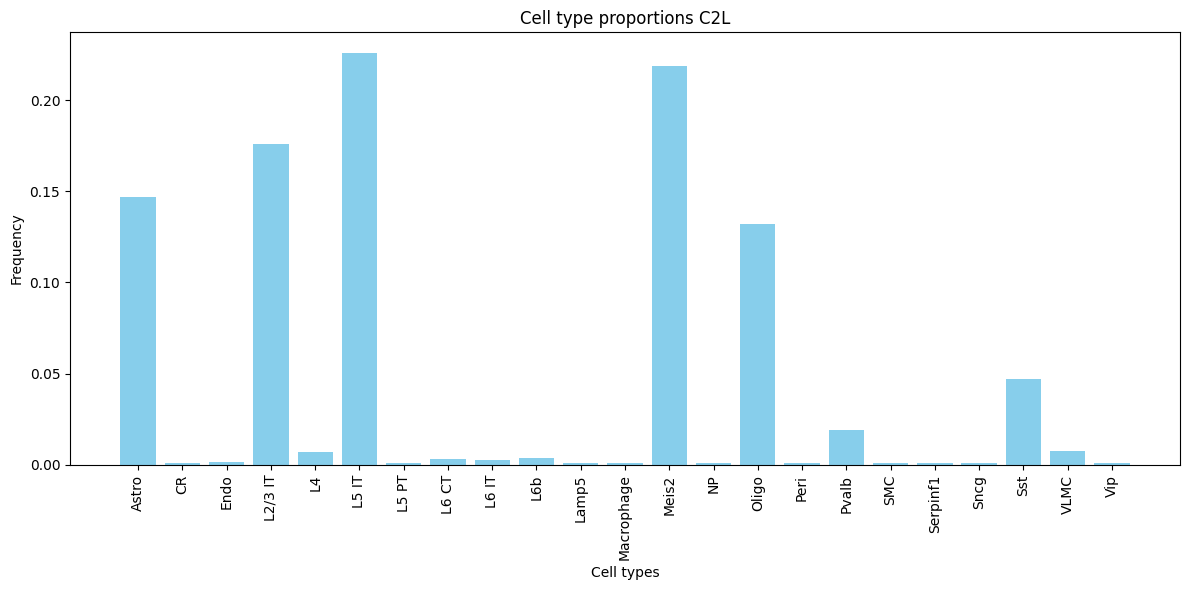

In [25]:
# UNCOMMENT FOR PROBABILITY DISTRIBUTION (L1 NORMALIZATION)

c2l_props = cell_abundance_df.sum(axis=0) #get total abundance per ct

c2l_props = c2l_props.sort_index() #sort descending

c2l_props /= c2l_props.sum() #compute proportions


# Plot
plt.figure(figsize=(12, 6))
plt.bar(c2l_props.index, c2l_props.values, color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Cell types')
plt.ylabel('Frequency')
plt.title('Cell type proportions C2L')
plt.tight_layout()
plt.show()



# Comparing sc and c2l proportions 

In [26]:
from collections import Counter

adata_sc = sc.read('../../lucas_data/SC_REF_for_VISIUM_preprocessed.h5ad')

sc_abundance = Counter(adata_sc.obs.cell_type)

sc_abundance = dict(sorted(sc_abundance.items()))


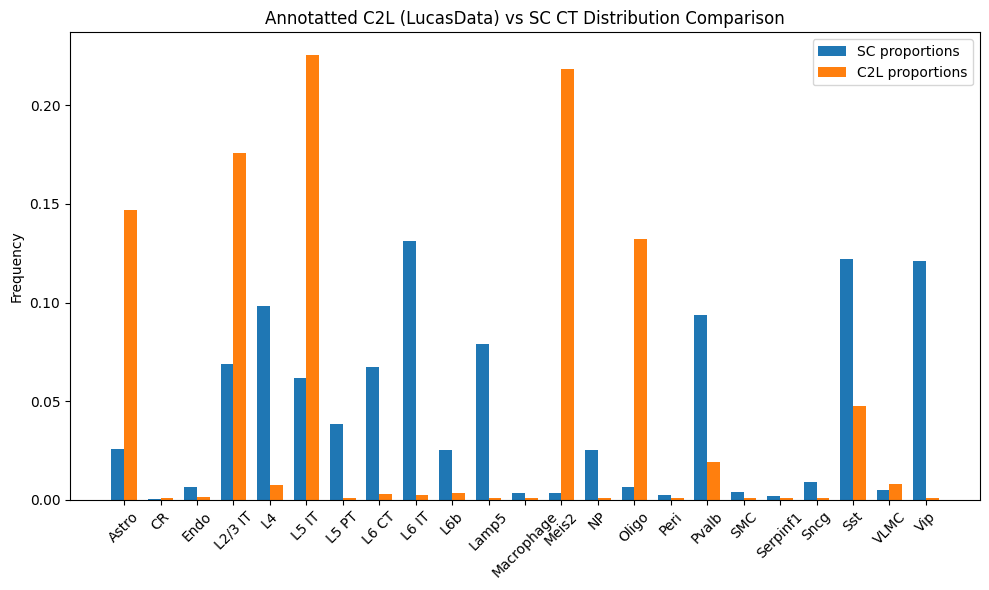

In [29]:
categories = list(sc_abundance.keys())

#get ct proportions
sc_total = sum(sc_abundance.values())
sc_props = {k: v / sc_total for k, v in sc_abundance.items()}

#Plot
x = np.arange(len(categories))                 # The label locations
width = 0.35                                   # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, list(sc_props.values()), width, label='SC proportions')
bars2 = ax.bar(x + width/2, c2l_props.values, width, label='C2L proportions')

# Labels, title and custom x-axis tick labels
ax.set_ylabel('Frequency')
ax.set_title('Annotatted C2L (LucasData) vs SC CT Distribution Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

# Annotatted CT distributions for each voxel

In [44]:
print(adata_st.obsm["cell_type_distribution"].iloc[[0]])

                    q05cell_abundance_w_sf_Astro  q05cell_abundance_w_sf_CR  \
AAACAAGTATCTCCCA-1                      0.000941                    0.00003   

                    q05cell_abundance_w_sf_Endo  \
AAACAAGTATCTCCCA-1                     0.000046   

                    q05cell_abundance_w_sf_L2/3 IT  q05cell_abundance_w_sf_L4  \
AAACAAGTATCTCCCA-1                        0.000028                   0.000027   

                    q05cell_abundance_w_sf_L5 IT  \
AAACAAGTATCTCCCA-1                      0.000028   

                    q05cell_abundance_w_sf_L5 PT  \
AAACAAGTATCTCCCA-1                      0.000028   

                    q05cell_abundance_w_sf_L6 CT  \
AAACAAGTATCTCCCA-1                      0.000027   

                    q05cell_abundance_w_sf_L6 IT  q05cell_abundance_w_sf_L6b  \
AAACAAGTATCTCCCA-1                      0.000027                    0.000028   

                    ...  q05cell_abundance_w_sf_NP  \
AAACAAGTATCTCCCA-1  ...                   0.0